Business Data Analytics Project

Telco Churn Prediction

Descriptive Analytics

Delton M Antony, 18MCMI05, MTech Artificial Intelligence

Garima Jain, 18MCMI14, MTech Artificial Intelligence

Descriptive Analytics of the Telco Churn Prediction Dataset:

Source: https://www.kaggle.com/blastchar/telco-customer-churn

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
The raw data contains 7043 rows (customers) and 21 columns (features).

Loading the dataset into a dataframe

In [1]:
import pandas as pd
dataset = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

Showing the information about the data

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Showing the first 10 records

In [3]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


List of Columns

In [4]:
list(dataset.columns.values)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

Checking for missing values

In [5]:
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We can see that there are no missing values in the data.

Checking for unique values. This is done so that we can determine easily which ones are the categorical variables.

In [6]:
dataset.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Now we need to separate the columns into categorical and numerical. Also, the customerID column has no relation to the target variable. Therefore store it separately. Furthermore, store the target variable ie Churn, separately.

In [7]:
id_col     = ['customerID']
target_col = ['Churn']
category_cols = [col for col in dataset.columns if dataset[col].nunique() <= 4 and col != 'Churn']
numeric_cols = [col for col in dataset.columns if col not in category_cols and col != 'Churn' and col != 'customerID']

Now let us see which are the categorical variables, which are stored in category_cols

In [8]:
category_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

Similarly, the following are the numeric variables.

In [9]:
numeric_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

Now let us start plotting the graphs and infer how the data is and how the independend variables are related to the target variable.

We will be using matplotlib and seaborn

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sea

In [11]:
plt.rc("font", size=14)
sea.set(style="white") #white background style for seaborn plots
sea.set(style="whitegrid", color_codes=True)

The followining set of graphs will give us an idea about the demographics and how the additional functionalities provided by the telco company is utilized by the customers.

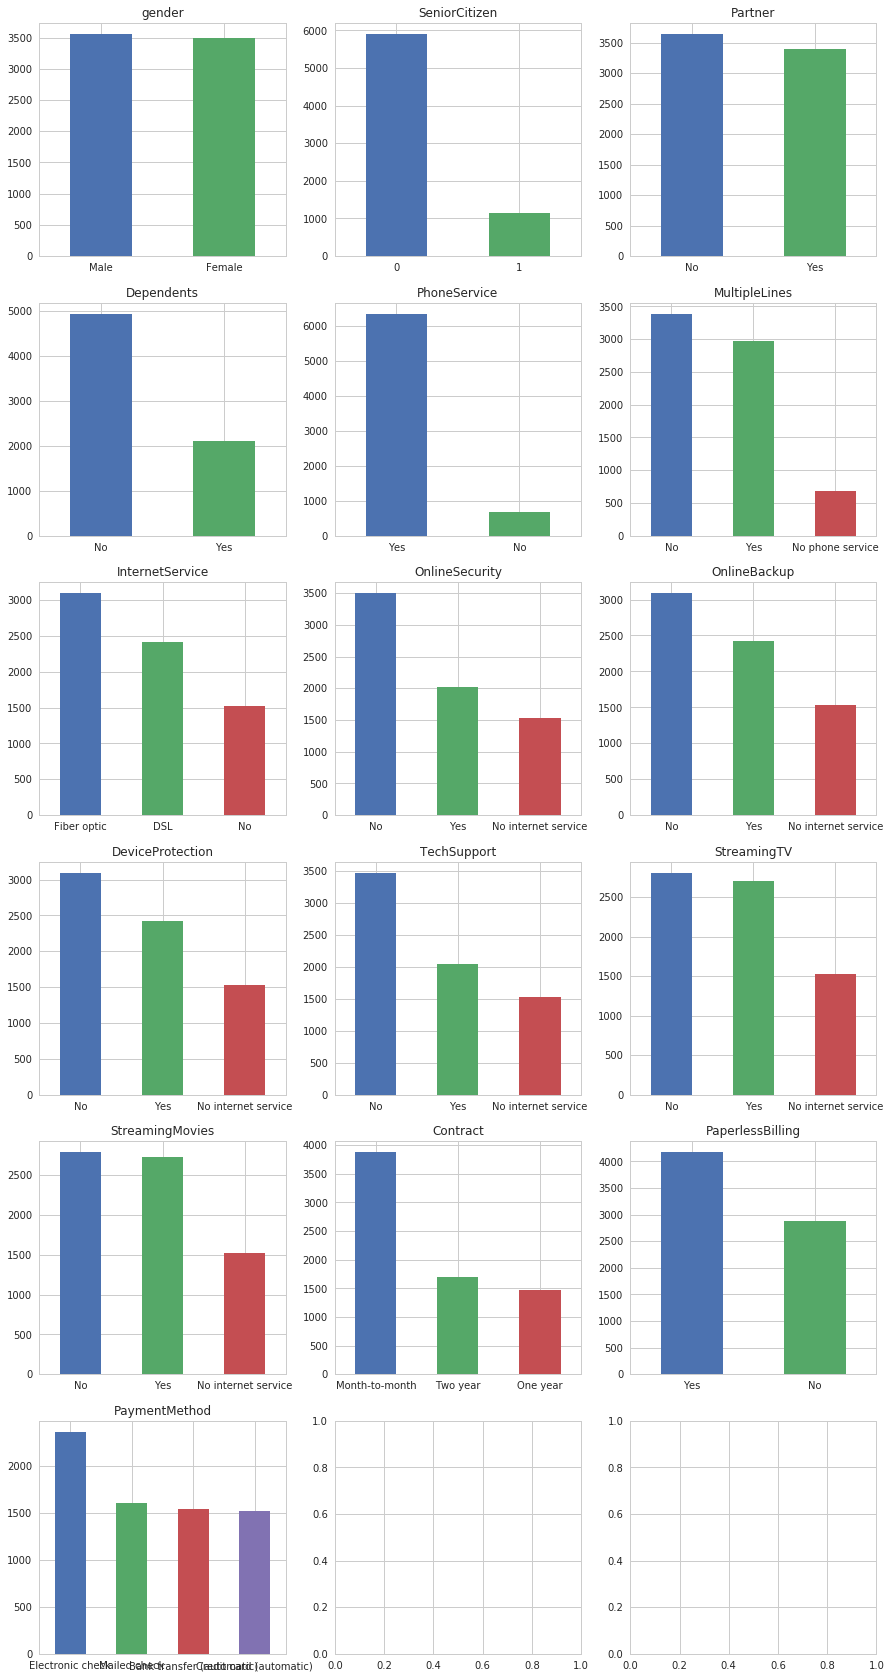

In [19]:
fig , axes = plt.subplots(nrows = 6 ,ncols = 3,figsize = (15,30))
for i, item in enumerate(category_cols):
    if i < 3:
        ax = dataset[item].value_counts().plot(kind ='bar', ax=axes[0, i], rot = 0)
    elif i >=3 and i < 6:
        ax = dataset[item].value_counts().plot(kind ='bar', ax=axes[1, i - 3], rot = 0)
    elif i >= 6 and i < 9:
        ax = dataset[item].value_counts().plot(kind ='bar', ax=axes[2, i - 6], rot = 0)
    elif i < 12:
        ax = dataset[item].value_counts().plot(kind ='bar', ax=axes[3, i - 9], rot = 0)
    elif i < 15:
        ax = dataset[item].value_counts().plot(kind ='bar', ax=axes[4, i - 12], rot = 0)
    elif i < 18:
        ax = dataset[item].value_counts().plot(kind ='bar', ax=axes[5, i - 15], rot = 0)
    ax.set_title(item)

Now let us plot Curners and Non Churners on a countplot

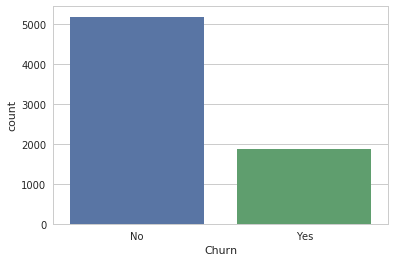

In [13]:
sea.countplot(x='Churn', data=dataset);

You can see that, roughly around one third of the customers are churning.

Let us plot categorical variables as a relation to Churn.

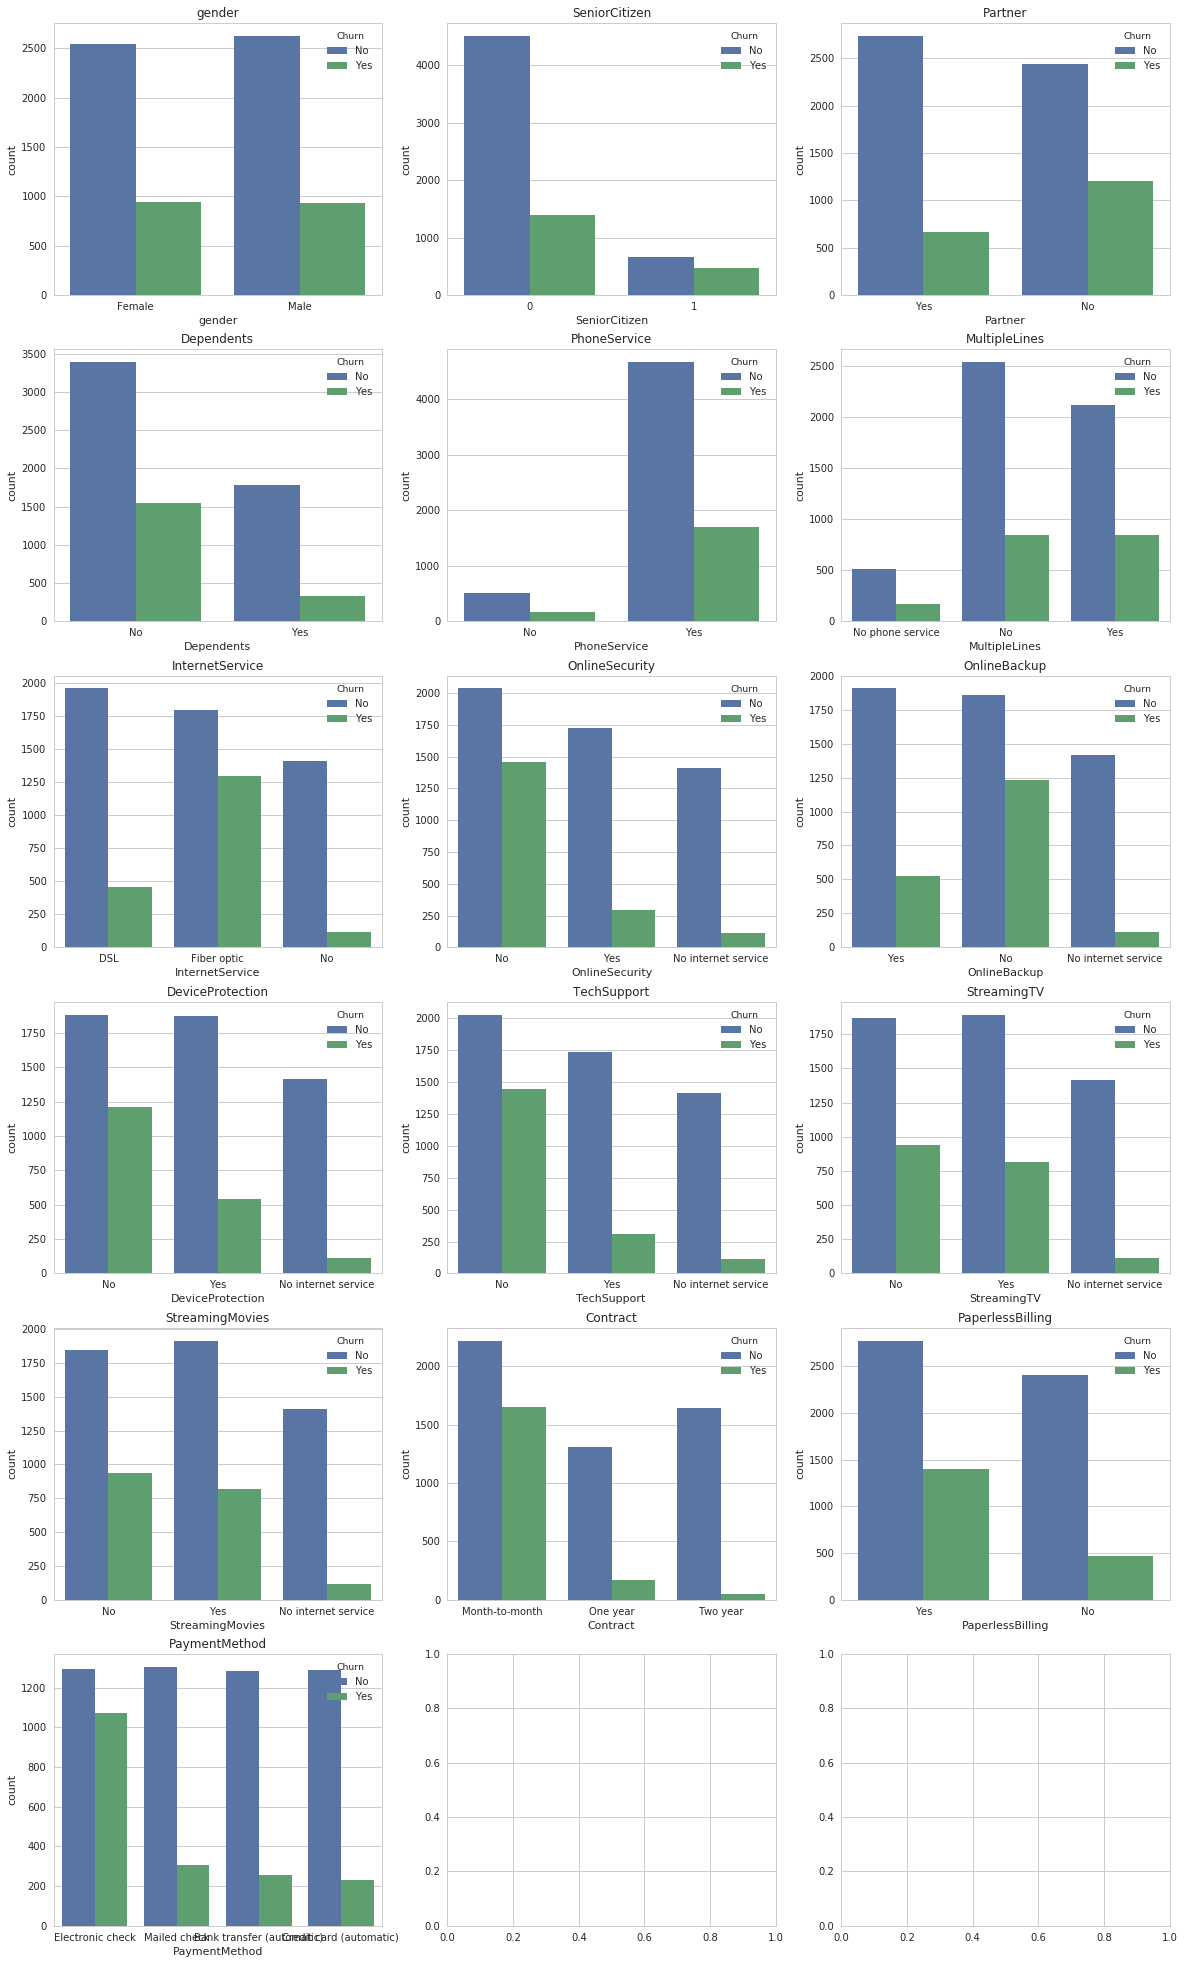

In [27]:
fig , axes = plt.subplots(nrows = 6 ,ncols = 3,figsize = (20, 35))
for i, col in enumerate(category_cols):
    if i < 3:
        #ax = churn_df[item].value_counts().plot(kind = 'bar',ax=axes[0,i],rot = 0)
        ax = sea.countplot(x=col, hue = dataset['Churn'], data=dataset, ax=axes[0, i])
    elif i >=3 and i < 6:
        #ax = churn_df[item].value_counts().plot(kind = 'bar',ax=axes[1,i-3],rot = 0)
        ax = sea.countplot(x=col, hue = dataset['Churn'], data=dataset, ax=axes[1, i - 3])
    elif i >= 6 and i < 9:
        #ax = churn_df[item].value_counts().plot(kind = 'bar',ax=axes[2,i-6],rot = 0)
        ax = sea.countplot(x=col, hue = dataset['Churn'], data=dataset, ax=axes[2, i - 6])
    elif i < 12:
        #ax = churn_df[item].value_counts().plot(kind = 'bar',ax=axes[3,i-9],rot = 0)
        ax = sea.countplot(x=col, hue = dataset['Churn'], data=dataset, ax=axes[3, i - 9])
    elif i < 15:
        #ax = churn_df[item].value_counts().plot(kind = 'bar',ax=axes[4,i-12],rot = 0)
        ax = sea.countplot(x=col, hue = dataset['Churn'], data=dataset, ax=axes[4, i - 12])
    elif i < 18:
        #ax = churn_df[item].value_counts().plot(kind = 'bar',ax=axes[5,i-15],rot = 0)
        ax = sea.countplot(x=col, hue = dataset['Churn'], data=dataset, ax=axes[5, i - 15])
    ax.set_title(col)

What we can understand from this is that:
1. Gender does not matter in customer attrition in this case.
2. Senior Citizens are more likely to churn.
3. If a customer is also a partner, then he/she is less likely to churn.
4. Customers without dependents are more likely to churn than settled people with dependents.
5. Customers with an Optical Fibre Internet Connection are highly probable to Churn. Will need to check this for possible reasons.
6. Customers without Online Security is highly likely to churn. Possible reason could be security breaches and frequent connectivity issues due to it.
7. Customers without online backup are also likely to Churn.
8. Customers without device protection are likely to Churn.
9. Customers without Tech Support are likely to Churn.
10. Customers with a month-to-month contract are the most frequent churners.
11. Customers using paperless billing churn more that those who transact in cash.
12. Customers paying their bills using electronic checks are highly likely to churn.

The TotalCharges column needs to be imputed. I am choosing to impute with zero because in case of missing value in TotalCharges, the tenure of those customers are also 0. This means they are new customers and may not have paid their bills yet.

In [15]:
import numpy as np
dataset['TotalCharges'] = dataset["TotalCharges"].replace(" ", np.nan)
dataset["TotalCharges"] = dataset["TotalCharges"].fillna(0)
dataset["TotalCharges"] = dataset["TotalCharges"].astype(float)

Now with numerical variables, let us make a correlation matrix and see the results.

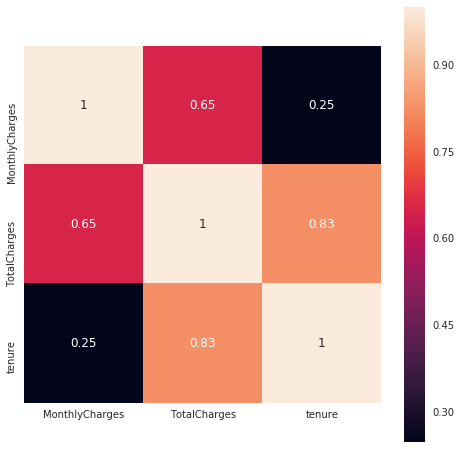

In [16]:
corr_matrix = dataset[['MonthlyCharges', 'TotalCharges'  , 'tenure']].corr()
plt.figure(figsize=(8, 8))
corrmap = sea.heatmap(corr_matrix, square=True, annot=True)

We can see that Tenure and TotalCharges are highly positively correlated. Of course, MonthlyCharges and TotalCharges are also correlated.

One thing I noticecd was that the customers who availed Fibre Optics Connection are churning. Fibre optics is extremely fast and efficient. Then why are the customers churning?

In [17]:
dataset.head(50)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


What is noted here is that the Fibre Optic Customers have a very high Monthly Bill. We can see that it lies around $100 monthly. It can be concluded these customers churn because of the high cost of fibre optics connection. It is highly likely that the competitor has cheaper fibre optics plans.

What should be done to reduce churn? What can we prescribe from the data?

1. Give senior citizens more incentive to stay on as customers.
2. For customers without dependents, they might move places often. Make connection relocation cheaper and easier.
3. Reduce the cost of Optical Fibre Internet Connection.
4. Make online security a default feature. It will reduce churn and will make customers more secure.
5. Similarly make online backup also accessible to customers.
6. Device Protection should be a default feature as damaged devices will lead to a possible churn.
7. Make Tech Support available to each customer.
8. Try to convert month-to-month contract customers to yearly contract customers. Provide more year-based payment plans and offers.
9. Find out the reason why the customers who opt for paperless billing and electronic checks churn more. Maybe a fault in the company's online billing process.